In [20]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params
from garch_framework.utils.datasets import GJRGARCHDataset
from garch_framework.models import GARCHModel, GJRGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [21]:
omega=0.2
alpha=0.2
gamma= 0.05
beta=0.5

In [22]:
grounds = [omega, alpha, gamma, beta]

In [23]:
data, volat = generate_ground_data(mode = 'GJRGARCH',omega=omega, alpha=alpha, gamma=gamma,beta=beta, n=10000)

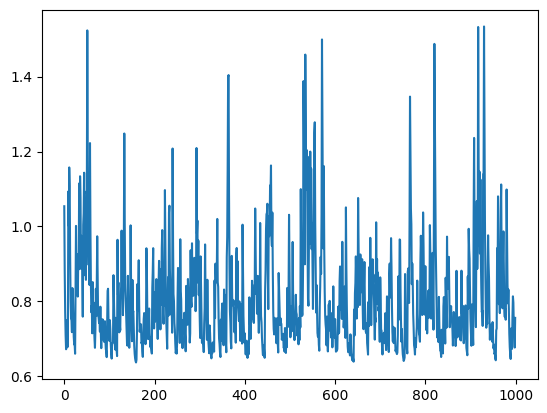

In [24]:
plt.plot(volat[:1000])

In [25]:
dataset= GJRGARCHDataset(data, volat, scale = 100)

In [26]:
for i in range(3):
    print(dataset[i])

(tensor([100.0000,  11.1848,   0.0000, 111.0910]), tensor(3.4093))
(tensor([100.0000,   3.4093,   0.0000,  77.7824]), tensor(3.4349))
(tensor([100.0000,   3.4349,   0.0000,  59.5731]), tensor(0.0041))


In [27]:
model = GJRGARCHModel()
criterion = CorrectedNLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [28]:
dataset[0]

(tensor([100.0000,  11.1848,   0.0000, 111.0910]), tensor(3.4093))

In [29]:
dataset[1]

(tensor([100.0000,   3.4093,   0.0000,  77.7824]), tensor(3.4349))

In [30]:
for i in range(5):
    print(dataset[i])

(tensor([100.0000,  11.1848,   0.0000, 111.0910]), tensor(3.4093))
(tensor([100.0000,   3.4093,   0.0000,  77.7824]), tensor(3.4349))
(tensor([100.0000,   3.4349,   0.0000,  59.5731]), tensor(0.0041))
(tensor([1.0000e+02, 4.1377e-03, 4.1377e-03, 5.0474e+01]), tensor(12.6499))
(tensor([100.0000,  12.6499,  12.6499,  45.2378]), tensor(53.3664))


In [31]:
dl = DataLoader(dataset, batch_size=128, shuffle=False, drop_last=False)

In [32]:
num_epochs = 100

for epochs in tqdm(range(num_epochs), desc="Training"):
    epoch_loss =0.0
    model.train()

    for inputs, resids in dl:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, resids)
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()

    avg_loss = epoch_loss/len(dl)
    

    
    tqdm.write(f"Epoch {epochs+1}/{num_epochs} | Loss: {avg_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 | Loss: 2.6087 | LR: 1.00e-03
Epoch 2/100 | Loss: 2.6078 | LR: 1.00e-03
Epoch 3/100 | Loss: 2.6075 | LR: 1.00e-03
Epoch 4/100 | Loss: 2.6073 | LR: 1.00e-03
Epoch 5/100 | Loss: 2.6071 | LR: 1.00e-03
Epoch 6/100 | Loss: 2.6069 | LR: 1.00e-03
Epoch 7/100 | Loss: 2.6068 | LR: 1.00e-03
Epoch 8/100 | Loss: 2.6067 | LR: 1.00e-03
Epoch 9/100 | Loss: 2.6066 | LR: 1.00e-03
Epoch 10/100 | Loss: 2.6065 | LR: 1.00e-03
Epoch 11/100 | Loss: 2.6064 | LR: 1.00e-03
Epoch 12/100 | Loss: 2.6063 | LR: 1.00e-03
Epoch 13/100 | Loss: 2.6063 | LR: 1.00e-03
Epoch 14/100 | Loss: 2.6062 | LR: 1.00e-03
Epoch 15/100 | Loss: 2.6062 | LR: 1.00e-03
Epoch 16/100 | Loss: 2.6061 | LR: 1.00e-03
Epoch 17/100 | Loss: 2.6061 | LR: 1.00e-03
Epoch 18/100 | Loss: 2.6060 | LR: 1.00e-03
Epoch 19/100 | Loss: 2.6060 | LR: 1.00e-03
Epoch 20/100 | Loss: 2.6060 | LR: 1.00e-03
Epoch 21/100 | Loss: 2.6060 | LR: 1.00e-03
Epoch 22/100 | Loss: 2.6059 | LR: 1.00e-03
Epoch 23/100 | Loss: 2.6059 | LR: 1.00e-03
Epoch 24/100 | Loss:

In [33]:
model_params = model.get_params()

In [34]:
model_params 

array([0.22324355, 0.2097927 , 0.06272089, 0.46998405], dtype=float32)

In [35]:
save_model_params('test_gjrgarch.json', grounds, model_params, model = 'GJRGARCH')